In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFR

In [4]:
data = pd.read_csv('data.csv')
# data.info(verbose =True,null_counts=True)

In [5]:
target = data.loc[:7999,'happiness']
data_copy = data.copy()
del data_copy['happiness']
# data_copy.info(verbose=True,null_counts=True)

In [6]:
target.shape

(8000,)

In [7]:
X = data_copy[:8000]
X.shape

(8000, 135)

#### 画累计方差贡献率曲线，找最佳降维后的范围

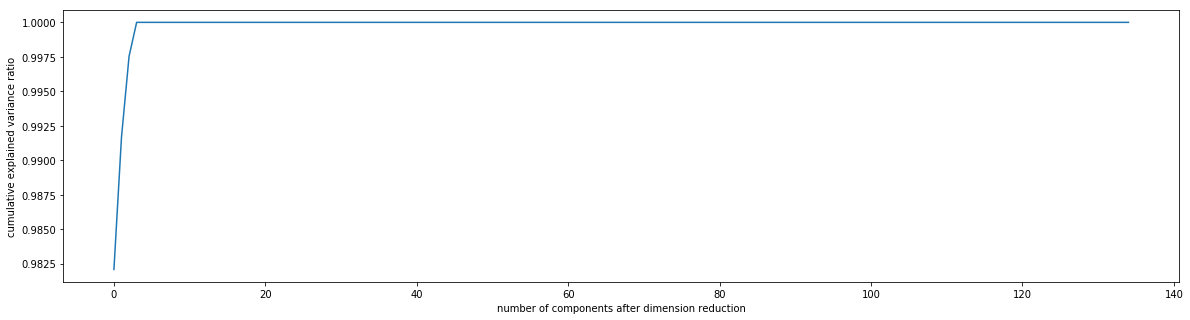

In [8]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel('cumulative explained variance ratio')
plt.show()

#### 降维后维度的学习曲线，继续缩小最佳维度的范围

-0.619553275 28


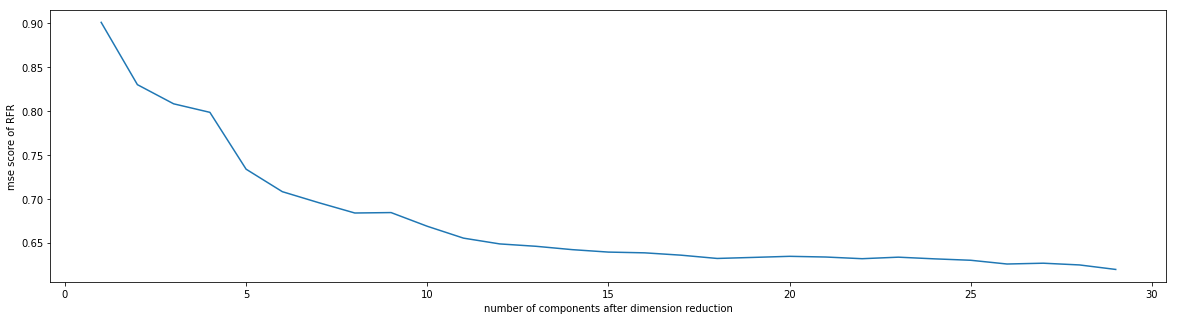

In [7]:
score = []
for i in range(1,30):
    X_dp = PCA(i).fit_transform(X)
    once = cross_val_score(RFR(random_state=0,n_jobs=-1)
                           ,X_dp,target,scoring='neg_mean_squared_error'
                           ,cv =5).mean()
    score.append(once)
    
print(max(score),score.index(max(score)))
plt.figure(figsize=[20,5])
plt.plot(range(1,30),[-i for i in score])
plt.xlabel('number of components after dimension reduction')
plt.ylabel('mse score of RFR')
plt.show()

In [13]:
cross_val_score(RFR(random_state=0,n_jobs=-1),X,target,scoring='neg_mean_squared_error'
                ,cv=10).mean()

-0.4835692750000001

In [8]:
X_dp = PCA(28).fit_transform(X)
cross_val_score(RFR(random_state=0,n_jobs=-1),X_dp,target,scoring='neg_mean_squared_error'
                ,cv=10).mean()

-0.625875625

In [12]:
pca = PCA().fit(X)
pca.explained_variance_ratio_

array([9.82089655e-01, 9.59353044e-03, 5.85826625e-03, 2.45812264e-03,
       1.88383280e-07, 1.82098070e-07, 3.09488067e-08, 1.59287008e-08,
       7.00963277e-09, 8.39939431e-10, 3.33183593e-10, 2.53088126e-10,
       6.13482711e-11, 4.32232523e-11, 3.23802401e-11, 3.13221921e-11,
       2.55985751e-11, 2.22682878e-11, 1.77077843e-11, 1.70026454e-11,
       1.49577464e-11, 1.31064253e-11, 1.04762300e-11, 6.81913204e-12,
       4.48608831e-12, 3.91090622e-12, 3.27351586e-12, 2.26300442e-12,
       1.87812530e-12, 1.59371457e-12, 1.57137303e-12, 1.50892906e-12,
       1.20800156e-12, 1.06046187e-12, 9.90460673e-13, 9.06016732e-13,
       7.24586846e-13, 6.68236985e-13, 6.43709352e-13, 5.40839283e-13,
       5.07001509e-13, 4.93627979e-13, 4.25523894e-13, 3.97595249e-13,
       3.75303583e-13, 3.57433162e-13, 3.43298702e-13, 3.28211224e-13,
       3.11155476e-13, 3.05103622e-13, 2.69534337e-13, 2.60553509e-13,
       2.49548070e-13, 2.44300279e-13, 2.36694719e-13, 2.27435070e-13,
      

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(5),X_dp,target,scoring='neg_mean_squared_error',cv=5).mean()

-0.926375

In [19]:
pca = PCA(28).fit(X)

In [20]:
v=pca.components_
v.shape

(28, 135)

In [21]:
s = pca.singular_values_
s.shape

(28,)

In [22]:
pca.n_components_

28